<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [4]:
dataFile = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [5]:
dataFile.rename(
    {'GRADES_PK_G':'PREK',
    'GRADES_KG_G':'KINDERGARTEN',
    'GRADES_4_G':'4G',
    'GRADES_8_G':'8G',
    'GRADES_12_G':'12G',
    'GRADES_1_8_G':'PRIMARY',
    'GRADES_9_12_G':'HIGHSCHOOL',
    'GRADES_ALL_G':'ALLG',
    'ENROLL':'ENROLL_ALL'
    },
    axis = 1, inplace = True)
dataFile.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4G,8G,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [6]:
np.NaN
type(np.NaN)
dataFile.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL                       491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
PREK                             173
KINDERGARTEN                      83
4G                                83
8G                                83
12G                               83
PRIMARY                          695
HIGHSCHOOL                       644
ALLG                              83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [7]:
dataFile.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4G,8G,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [8]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL_ALL                    1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  PRE

In [9]:
dataFile.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL                       491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
PREK                             173
KINDERGARTEN                      83
4G                                83
8G                                83
12G                               83
PRIMARY                          695
HIGHSCHOOL                       644
ALLG                              83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [10]:
dataFile.dropna(subset = ["AVG_READING_4_SCORE"], inplace = True)

In [11]:
dataFile.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4G,8G,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [12]:
dataFile.dropna(subset = ["AVG_READING_4_SCORE"], inplace = True)

In [13]:
dataFile.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4G,8G,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


In [14]:
dataFile.ALLG.isna().sum()

76

In [15]:
(dataFile.ALLG-dataFile.PREK-dataFile.KINDERGARTEN-dataFile.PRIMARY-dataFile.HIGHSCHOOL).describe()

count       438.000000
mean       5572.116438
std       18771.688566
min           0.000000
25%           0.000000
50%           0.000000
75%        1661.250000
max      156439.000000
dtype: float64

In [16]:
((dataFile.ALLG-dataFile.PREK-dataFile.KINDERGARTEN-dataFile.PRIMARY-dataFile.HIGHSCHOOL) / dataFile.ALLG * 100).describe()

count    438.000000
mean       0.480138
std        1.165665
min        0.000000
25%        0.000000
50%        0.000000
75%        0.234742
max        7.702014
dtype: float64

In [17]:
dataFile["ALLG"] = dataFile["ALLG"].fillna(dataFile.PREK + dataFile.PRIMARY + dataFile.HIGHSCHOOL)

In [18]:
dataFile[dataFile.ALLG.isna()][['PREK','PRIMARY','HIGHSCHOOL','ENROLL_ALL']].notna().any()

PREK          False
PRIMARY       False
HIGHSCHOOL    False
ENROLL_ALL    False
dtype: bool

In [19]:
dataFile[dataFile.ENROLL_ALL.isna()].ALLG.notna().sum()

93

In [20]:
((dataFile.ALLG - dataFile.ENROLL_ALL) / dataFile.ALLG).describe()

count    481.000000
mean       0.027597
std        0.054886
min       -0.096404
25%        0.004437
50%        0.014650
75%        0.031764
max        0.450693
dtype: float64

In [21]:
dataFile.ENROLL_ALL = dataFile.ENROLL_ALL.fillna(dataFile.ALLG)

In [22]:
dataFile[dataFile.ENROLL_ALL.isna()].ALLG.notna().sum()

0

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [23]:
dataFile["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = dataFile["SUPPORT_SERVICES_EXPENDITURE"] / dataFile["ALLG"]

In [24]:
dataFile["ALLG"].describe()

count    5.740000e+02
mean     9.612496e+05
std      1.123904e+06
min      6.943300e+04
25%      2.824750e+05
50%      6.786335e+05
75%      1.052486e+06
max      6.437202e+06
Name: ALLG, dtype: float64

In [25]:
dataFile["SCHOOL_SIZE"] = pd.cut(x = dataFile["ALLG"], bins= [0, 70000, 100000, 300000, 500000, 700000], labels = ["VERY SMALL", "SMALL", "MEDIUM", "LARGE", "VERY LARGE"], include_lowest = True)

In [26]:
dataFile[["ALLG", "SCHOOL_SIZE"]]

,ALLG,SCHOOL_SIZE
0,731634.0,NaN
2,673477.0,VERY LARGE
3,441490.0,LARGE
4,5254844.0,NaN
5,612635.0,VERY LARGE
...,...,...
1710,NaN,NaN
1711,NaN,NaN
1712,NaN,NaN
1713,NaN,NaN


In [27]:
dataFile.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,SCHOOL_SIZE
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,3.838128,MEDIUM
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,2.139821,LARGE
567,2003_CONNECTICUT,CONNECTICUT,2003,548466.0,6959891.0,351001.0,2481901.0,4126989.0,6751815.0,3721466.0,...,37229.0,353661.0,169409.0,577203.0,241.0,284.0,228.0,267.0,3.381148,VERY LARGE
568,2003_DELAWARE,DELAWARE,2003,111282.0,1242436.0,91986.0,794472.0,355978.0,1317447.0,673997.0,...,7292.0,74352.0,34770.0,117668.0,236.0,277.0,224.0,265.0,3.124554,MEDIUM
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,2971.0,45706.0,16828.0,78057.0,205.0,243.0,188.0,239.0,5.202327,SMALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2015_SOUTH_DAKOTA,SOUTH_DAKOTA,2015,132836.0,1415149.0,206853.0,425614.0,782682.0,1464781.0,709363.0,...,8616.0,82347.0,37242.0,134253.0,240.0,285.0,220.0,267.0,3.175028,MEDIUM
1217,2015_UTAH,UTAH,2015,573913.0,4705084.0,400213.0,2487937.0,1816934.0,4537962.0,2367650.0,...,43828.0,401436.0,184303.0,647870.0,243.0,286.0,226.0,269.0,1.800867,VERY LARGE
1218,2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,...,6271.0,48722.0,26002.0,87866.0,243.0,290.0,230.0,274.0,6.449013,SMALL
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,4.187910,MEDIUM


In [28]:
dataFile[["AVG_READING_4_SCORE", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "SCHOOL_SIZE"]]

,AVG_READING_4_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,SCHOOL_SIZE
0,207.0,1.004650,NaN
2,209.0,1.496312,VERY LARGE
3,211.0,1.095128,LARGE
4,202.0,1.621537,NaN
5,217.0,1.691007,VERY LARGE
...,...,...,...
1710,224.0,NaN,NaN
1711,220.0,NaN,NaN
1712,213.0,NaN,NaN
1713,220.0,NaN,NaN


In [29]:
dataFile["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"].mean()

3.0383851936819304

In [30]:
dataFile.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [44]:
dataFile = dataFile.dropna(how = "any", axis = 0)

In [45]:
newDataFile = dataFile
newDataFile

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,12G,PRIMARY,HIGHSCHOOL,ALLG,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,SCHOOL_SIZE
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,3.838128,MEDIUM
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,2.139821,LARGE
567,2003_CONNECTICUT,CONNECTICUT,2003,548466.0,6959891.0,351001.0,2481901.0,4126989.0,6751815.0,3721466.0,...,37229.0,353661.0,169409.0,577203.0,241.0,284.0,228.0,267.0,3.381148,VERY LARGE
568,2003_DELAWARE,DELAWARE,2003,111282.0,1242436.0,91986.0,794472.0,355978.0,1317447.0,673997.0,...,7292.0,74352.0,34770.0,117668.0,236.0,277.0,224.0,265.0,3.124554,MEDIUM
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,2971.0,45706.0,16828.0,78057.0,205.0,243.0,188.0,239.0,5.202327,SMALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2015_SOUTH_DAKOTA,SOUTH_DAKOTA,2015,132836.0,1415149.0,206853.0,425614.0,782682.0,1464781.0,709363.0,...,8616.0,82347.0,37242.0,134253.0,240.0,285.0,220.0,267.0,3.175028,MEDIUM
1217,2015_UTAH,UTAH,2015,573913.0,4705084.0,400213.0,2487937.0,1816934.0,4537962.0,2367650.0,...,43828.0,401436.0,184303.0,647870.0,243.0,286.0,226.0,269.0,1.800867,VERY LARGE
1218,2015_VERMONT,VERMONT,2015,85184.0,1996795.0,105333.0,1546600.0,344862.0,1969415.0,983532.0,...,6271.0,48722.0,26002.0,87866.0,243.0,290.0,230.0,274.0,6.449013,SMALL
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,4.187910,MEDIUM


In [46]:
newDataFile = [["AVG_READING_4_SCORE", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "SCHOOL_SIZE"]]

In [49]:
secondNewDF = newDataFile.sort_values(by = ["AVG_READING_4_SCORE", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "SCHOOL_SIZE"])

AttributeError: 'list' object has no attribute 'sort_values'

In [48]:
secondNewDF[["AVG_READING_4_SCORE", "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", "SCHOOL_SIZE"]]

NameError: name 'secondNewDF' is not defined

Final feature list: **<LIST FEATURES HERE\>**

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

<h2> EDA </h2>

Visualization 1

In [32]:
sns.catplot(x = "SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT", y = "AVG_READING_4_SCORE", hue = "SCHOOL_SIZE", data = secondNewDF)

NameError: name 'secondNewDF' is not defined

**<CAPTION FOR VIZ 1>**

Visualization 2

In [33]:
plt.figure(figsize = (30,5))
sns.countplot(data = secondNewDF, x = "AVG_READING_4_SCORE", hue = "SCHOOL_SIZE")

NameError: name 'secondNewDF' is not defined

<Figure size 2160x360 with 0 Axes>

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = dataFile[["ALLG","SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"]].dropna()
y = dataFile.loc[X.index]["AVG_READING_4_SCORE"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [38]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [39]:
# create your model here
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

Text(0, 0.5, 'AVG_READING_4_SCORE')

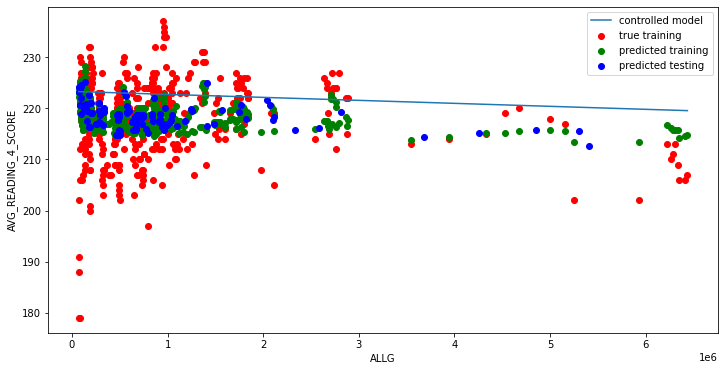

In [43]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "ALLG"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_READING_4_SCORE")

<h2> Summary </h2>

With this code we are able to understand the correlation between the average reading score of 4th graders by state and how many students are enrolled in school in that state. It seems that when the state spends more money on their students, they perform better which makes sense (probably more resources). Scores are best when there is an average amount of students within a state- not too many and not too little. 